Tutorial 0: Visualization
=========================

In this tutorial, we quickly cover visualization in **PyAutoLens** and make sure images display clealry in your
Jupyter notebook and on your computer screen.

In [1]:
#%matplotlib inline

from os import path
import autolens as al
import autolens.plot as aplt

__Directories__

**PyAutoLens assumes** the working directory is `autolens_workspace` on your hard-disk. This is so that it can:
 
 - Load configuration settings from config files in the `autolens_workspace/config` folder.
 - Load example data from the `autolens_workspace/dataset` folder.
 - Output the results of models fits to your hard-disk to the `autolens/output` folder. 
    
At the top of every tutorial notebook, you'll see the following cell. This cell uses the project `pyprojroot` to
locate the path to the workspace on your computer and use it to set the working directory of the notebook.

In [2]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


If the printed working directory does not match the workspace path on your computer, you can manually set it
as follows (the example below shows the path I would use on my laptop. The code is commented out so you do not
use this path in this tutorial!

In [3]:
workspace_path = "/Users/Jammy/Code/PyAuto/autolens_workspace"
# #%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

Working Directory has been set to `/Users/Jammy/Code/PyAuto/autolens_workspace`


__Dataset__

The `dataset_path` specifies where the dataset is located, which is the 
directory `autolens_workspace/dataset/imaging/no_lens_light/mass_sie__source_sersic`.

There are many example simulated images of strong lenses in this directory that will be used throughout the 
**HowToLens** lectures.

In [4]:
dataset_path = path.join(
    "dataset", "imaging", "no_lens_light", "mass_sie__source_sersic"
)

We now load this dataset from .fits files and create an instance of an `imaging` object.

In [5]:
imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "image.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    psf_path=path.join(dataset_path, "psf.fits"),
    pixel_scales=0.1,
)

We can plot an image as follows:

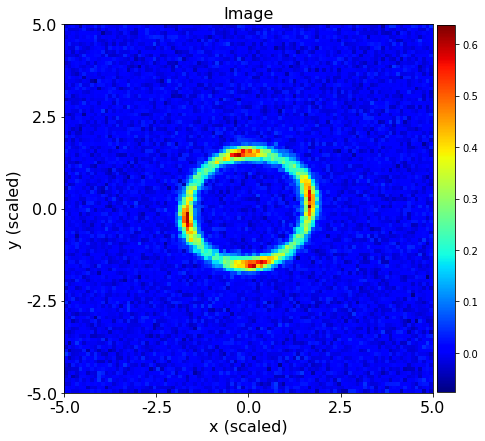

In [6]:
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures_2d(image=True)

__Plot Customization__

Does the figure display correctly on your computer screen? 

If not, you can customize a number of matplotlib setup options using a `MatPlot2D` object in **PyAutoLens**, which 
wraps the `matplotlib` methods used to display the image.

(For example, the `Figure` class wraps the `matplotlib` method `plt.figure(), whereas the `Yticks` class wraps
`plt.yticks`).

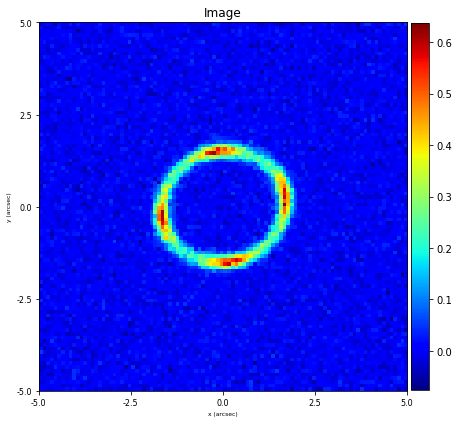

In [7]:
mat_plot_2d = aplt.MatPlot2D(
    figure=aplt.Figure(figsize=(7, 7)),
    yticks=aplt.YTicks(fontsize=8),
    xticks=aplt.XTicks(fontsize=8),
    title=aplt.Title(fontsize=12),
    ylabel=aplt.YLabel(fontsize=6),
    xlabel=aplt.XLabel(fontsize=6),
)

imaging_plotter = aplt.ImagingPlotter(imaging=imaging, mat_plot_2d=mat_plot_2d)
imaging_plotter.figures_2d(image=True)

Many matplotlib options can be customized, but for now we're only concerned with making sure figures display clear in 
your Jupyter Notebooks. Nevertheless, a comprehensive API reference guide of all `matplotlib` wrappers and methods can 
be found in the `autolens_workspace/plot` package. You should check this out once you are more familiar with 
**PyAutoLens**.

Ideally, we would not specify a new `MatPlot2D` object every time we plot an image, especially as you would be 
changing the same option to the same values every time (e.g. the figsize) to make the figure display correctly over 
and over again. Fortunately, the default values used by **PyAutoLens** can be fully customized via the config files.

Checkout the following files in `autolens_workspace/config/visualize/mat_wrap`:

All default matplotlib values used by **PyAutoLens** are here. There are a lot of files, so lets only focus on whats 
important for displaying figures correctly:

 - Figure.ini -> [figure] -> figsize
 - YLabel.ini -> [figure] -> fontsize
 - XLabel.ini -> [figure] -> fontsize
 - TickParams.ini -> [figure] -> labelsize
 - YTicks.ini -> [figure] -> labelsize
 - XTicks.ini -> [figure] -> labelsize

Don't worry about all the other files or options listed for now, as they`ll make a lot more sense once you are familiar 
with **PyAutoLens**.

If you had to change any of the above settings to get the figures to display clearly, you should update their values
in the corresponding config files above (you will need to reset your Jupyter notebook server for these changes to 
take effect, so make sure you have the right values using the `mat_plot_2d` object in the cell above beforehand!).

__Subplots__

In addition to plotting individual `figures`, **PyAutoLens** can also plot `subplots` which are again customized via
the `mat_plot` objects.

Lets plot a subplot of our `Imaging` data:

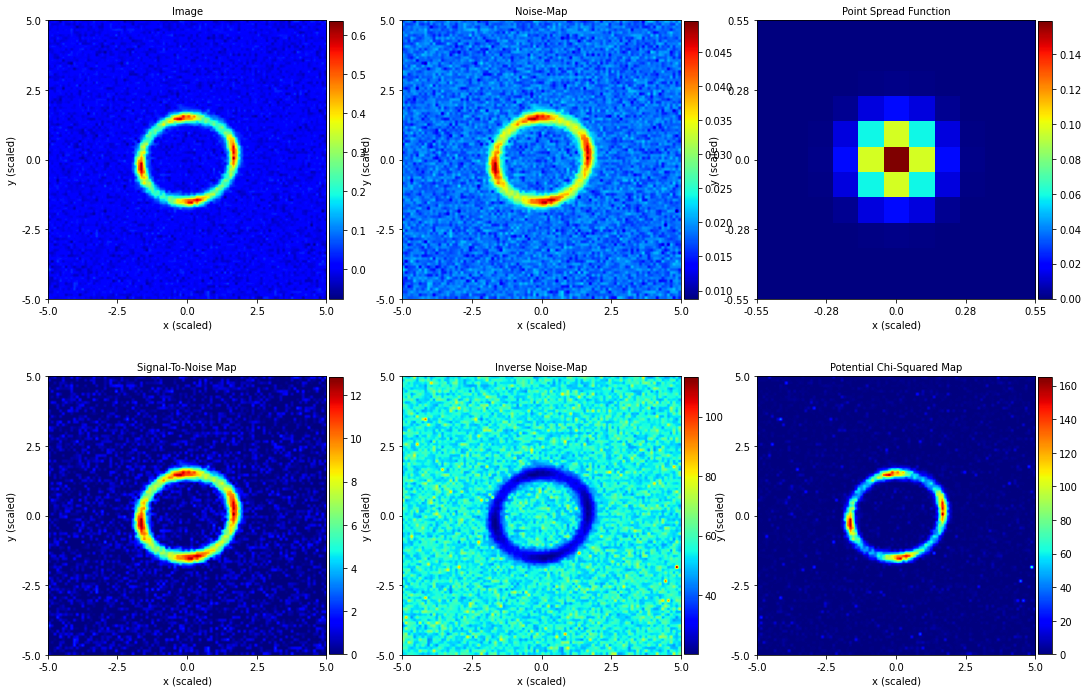

In [8]:
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.subplot_imaging()

Again, we can customize this using a `MatPlot2D`.

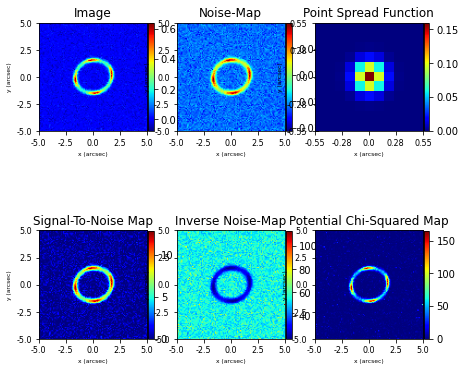

In [9]:
mat_plot_2d = aplt.MatPlot2D(
    figure=aplt.Figure(figsize=(7, 7)),
    yticks=aplt.YTicks(fontsize=8),
    xticks=aplt.XTicks(fontsize=8),
    title=aplt.Title(fontsize=12),
    ylabel=aplt.YLabel(fontsize=6),
    xlabel=aplt.XLabel(fontsize=6),
)

imaging_plotter = aplt.ImagingPlotter(imaging=imaging, mat_plot_2d=mat_plot_2d)
imaging_plotter.subplot_imaging()

Again, you can customize the default appearance of subplots by editing the config files above, but now editing the
corresponding entries under the [subplot] headers.

We can also customize what is included in a plot. for example whether the origin of the coordinate system appears on 
the image:

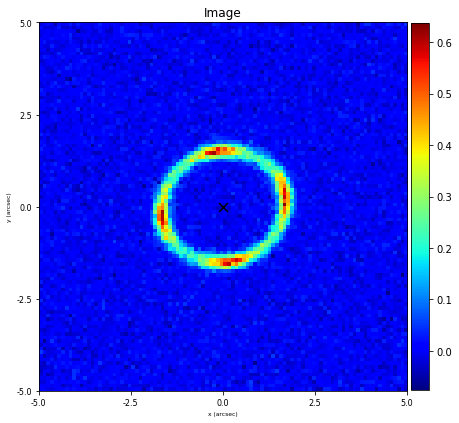

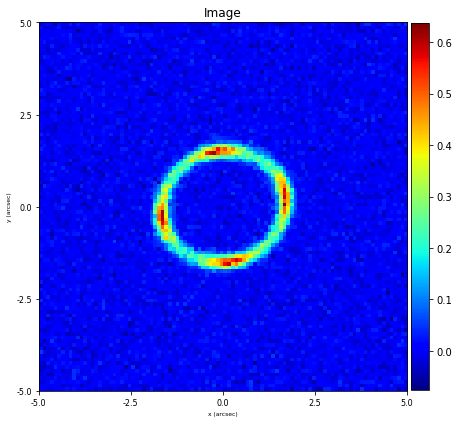

In [10]:
include_2d = aplt.Include2D(origin=True)
imaging_plotter = aplt.ImagingPlotter(
    imaging=imaging, mat_plot_2d=mat_plot_2d, include_2d=include_2d
)
imaging_plotter.figures_2d(image=True)

include_2d = aplt.Include2D(origin=False)
imaging_plotter = aplt.ImagingPlotter(
    imaging=imaging, mat_plot_2d=mat_plot_2d, include_2d=include_2d
)
imaging_plotter.figures_2d(image=True)

__Wrap Up__

Throughout the **HowToLens** lectures you'll see lots more objects that can be included on figures and subplots.

Just like the matplotlib setup, you can customize what does and does not appear on figures by default using the 
config file `autolens_workspace/config/visualize/include.ini`

Great! Hopefully, visualization in **PyAutoLens** is displaying nicely for us to get on with the **HowToLens** 
lecture series.